## DNN을 이용한 와인 등급 분류

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

redwine = pd.read_csv("winequality-red.csv", sep=";")
redwine_X = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1] - 3

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(redwine_X, redwine_y, 
                                                    test_size=0.3)

model = Sequential()
model.add(Dense(100, input_shape=(11,), activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y.to_numpy(),
                    batch_size=200, epochs=300)

Epoch 1/300
6/6 [==============================] - 2s 5ms/step - loss: 1.5517 - accuracy: 0.3584
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 1.3164 - accuracy: 0.4263
Epoch 3/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2099 - accuracy: 0.4772
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 1.2127 - accuracy: 0.4576
Epoch 5/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1895 - accuracy: 0.4799
Epoch 6/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1778 - accuracy: 0.4754
Epoch 7/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1908 - accuracy: 0.4951
Epoch 8/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1867 - accuracy: 0.4701
Epoch 9/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1560 - accuracy: 0.5112
Epoch 10/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1451 - accuracy: 0.5004
Epoch 11/300
6/6 [===========

6/6 [==============================] - 0s 5ms/step - loss: 0.9417 - accuracy: 0.5987
Epoch 167/300
6/6 [==============================] - ETA: 0s - loss: 0.9289 - accuracy: 0.63 - 0s 5ms/step - loss: 0.9470 - accuracy: 0.6095
Epoch 168/300
6/6 [==============================] - 0s 5ms/step - loss: 0.9392 - accuracy: 0.5818
Epoch 169/300
6/6 [==============================] - 0s 5ms/step - loss: 0.9481 - accuracy: 0.5952
Epoch 170/300
6/6 [==============================] - 0s 4ms/step - loss: 0.9270 - accuracy: 0.5987
Epoch 171/300
6/6 [==============================] - 0s 5ms/step - loss: 0.9357 - accuracy: 0.5987
Epoch 172/300
6/6 [==============================] - 0s 5ms/step - loss: 0.9598 - accuracy: 0.5791
Epoch 173/300
6/6 [==============================] - 0s 4ms/step - loss: 0.9473 - accuracy: 0.5880
Epoch 174/300
6/6 [==============================] - 0s 5ms/step - loss: 0.9433 - accuracy: 0.6050
Epoch 175/300
6/6 [==============================] - 0s 14ms/step - loss: 0.9366 

6/6 [==============================] - 0s 5ms/step - loss: 0.9228 - accuracy: 0.6023
Epoch 249/300
6/6 [==============================] - 0s 5ms/step - loss: 0.9107 - accuracy: 0.6014
Epoch 250/300
6/6 [==============================] - 0s 5ms/step - loss: 0.9202 - accuracy: 0.6023
Epoch 251/300
6/6 [==============================] - 0s 4ms/step - loss: 0.9049 - accuracy: 0.6014
Epoch 252/300
6/6 [==============================] - 0s 12ms/step - loss: 0.9167 - accuracy: 0.5961
Epoch 253/300
6/6 [==============================] - 0s 16ms/step - loss: 0.9234 - accuracy: 0.6014
Epoch 254/300
6/6 [==============================] - 0s 11ms/step - loss: 0.9197 - accuracy: 0.6095
Epoch 255/300
6/6 [==============================] - 0s 11ms/step - loss: 0.9040 - accuracy: 0.6041
Epoch 256/300
6/6 [==============================] - 0s 6ms/step - loss: 0.9093 - accuracy: 0.5934
Epoch 257/300
6/6 [==============================] - 0s 6ms/step - loss: 0.9071 - accuracy: 0.5996
Epoch 258/300
6/6 [=

In [2]:
test_loss, test_acc = model.evaluate(test_X, test_y)

15/15 [==============================] - 0s 2ms/step - loss: 1.0037 - accuracy: 0.5417


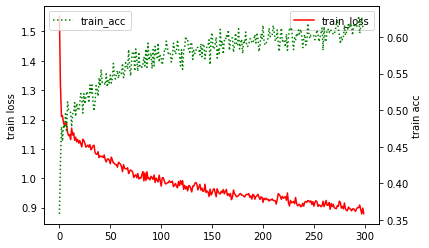

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(history.history['loss'], 'r-', label="train_loss")
ax1.set_ylabel("train loss")
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'],'g:',label="train_acc")
ax2.set_ylabel("train acc")
ax2.legend()
plt.show()